# twcu9_10 主成分分析

スライド slide11


2022/11/30 の演習資料

# 1 復習 判別分析

In [3]:
library(mclust)

Warning message:
"package 'mclust' was built under R version 3.6.3"Package 'mclust' version 5.4.7
Type 'citation("mclust")' for citing this R package in publications.


## 1.1  データの読み込み
page 5
banknoteがmclustから読めないのでこの部分はスライドと異なります。

In [4]:
#  データの呼び出し
banknote= read.table('banknote.txt', sep = ' ', header=TRUE )
head(banknote)

Status,Length,Left,Right,Bottom,Top,Diagonal
genuine,214.8,131.0,131.1,9.0,9.7,141.0
genuine,214.6,129.7,129.7,8.1,9.5,141.7
genuine,214.8,129.7,129.7,8.7,9.6,142.2
genuine,214.8,129.7,129.6,7.5,10.4,142.0
genuine,215.0,129.6,129.7,10.4,7.7,141.8
genuine,215.7,130.8,130.5,9.0,10.1,141.4


## 1.2 ホールドアウト検証のための bn.train, bn.test の作成
page 6

In [9]:
#  データの分割（ホールドアウト検証）
x <- seq( 4, 200, by = 4 )  # 4の倍数
bn.test <- banknote[ x,  ]
bn.train <- banknote[ -x,  ]
head(bn.train)
head(bn.test)

,Status,Length,Left,Right,Bottom,Top,Diagonal
1,genuine,214.8,131.0,131.1,9.0,9.7,141.0
2,genuine,214.6,129.7,129.7,8.1,9.5,141.7
3,genuine,214.8,129.7,129.7,8.7,9.6,142.2
5,genuine,215.0,129.6,129.7,10.4,7.7,141.8
6,genuine,215.7,130.8,130.5,9.0,10.1,141.4
7,genuine,215.5,129.5,129.7,7.9,9.6,141.6


,Status,Length,Left,Right,Bottom,Top,Diagonal
4,genuine,214.8,129.7,129.6,7.5,10.4,142.0
8,genuine,214.5,129.6,129.2,7.2,10.7,141.7
12,genuine,215.1,129.5,129.6,7.7,10.5,142.2
16,genuine,214.5,129.8,129.8,9.3,8.5,141.6
20,genuine,214.7,130.2,129.9,8.6,10.0,141.9
24,genuine,215.7,130.2,130.0,8.7,10.0,141.6


## 1.3 線形判別分析
page 7

In [10]:
#  ロジスティック回帰の実行
#  分析の実行
library( MASS )
res.lda <- lda( Status ~ Length + Bottom + Top, data = bn.train )
#  結果の出力
res.lda


Call:
lda(Status ~ Length + Bottom + Top, data = bn.train)

Prior probabilities of groups:
counterfeit     genuine 
        0.5         0.5 

Group means:
              Length    Bottom      Top
counterfeit 214.8067 10.566667 11.12267
genuine     214.9973  8.266667 10.22800

Coefficients of linear discriminants:
              LD1
Length  0.4085213
Bottom -1.3893775
Top    -1.6223340

## 1.4 線形判別分析を行う場合
page 8

In [11]:
b <- -1 * apply( res.lda$mean %*% res.lda$scaling, 2, mean )
b

LD1 
-57.38978

In [12]:
#  ホールドアウト検証によるモデル評価（混同行列の作成）
pred.lda <- predict( res.lda, bn.test )
table( bn.test$Status ,  pred.lda$class )



             
              counterfeit genuine
  counterfeit          23       2
  genuine               0      25

In [ ]:
#  誤判別率の計算
2 / 50

## 1.5 スイス紙幣の真贋データの分析例
page 9

In [14]:
#  補遺：LOOCVによるモデル評価
res.cv <- lda( Status ~ Length + Bottom + Top, data = banknote, CV = TRUE )
#  LOOCVの結果（出力結果は省略）
res.cv$class



[1] genuine     genuine     genuine     genuine     genuine     genuine    
  [7] genuine     genuine     genuine     genuine     genuine     genuine    
 [13] genuine     genuine     genuine     genuine     genuine     genuine    
 [19] genuine     genuine     genuine     genuine     genuine     genuine    
 [25] genuine     genuine     genuine     genuine     genuine     genuine    
 [31] genuine     genuine     genuine     genuine     genuine     genuine    
 [37] genuine     genuine     genuine     genuine     genuine     genuine    
 [43] genuine     genuine     genuine     genuine     genuine     genuine    
 [49] genuine     genuine     genuine     genuine     genuine     genuine    
 [55] genuine     genuine     genuine     genuine     genuine     genuine    
 [61] genuine     genuine     genuine     genuine     genuine     genuine    
 [67] genuine     genuine     genuine     genuine     genuine     genuine    
 [73] genuine     genuine     genuine     genuine     genuine     genuine    
 [79] genuine     genuine     genuine     genuine     genuine     genuine    
 [85] counterfeit genuine     genuine     genuine     genuine     genuine    
 [91] genuine     genuine     genuine     genuine     genuine     genuine    
 [97] genuine     genuine     genuine     genuine     counterfeit counterfeit
[103] counterfeit counterfeit counterfeit counterfeit counterfeit counterfeit
[109] counterfeit counterfeit genuine     counterfeit counterfeit counterfeit
[115] counterfeit genuine     counterfeit counterfeit counterfeit counterfeit
[121] counterfeit counterfeit counterfeit counterfeit counterfeit counterfeit
[127] counterfeit counterfeit counterfeit counterfeit counterfeit counterfeit
[133] counterfeit counterfeit counterfeit counterfeit counterfeit counterfeit
[139] counterfeit counterfeit counterfeit counterfeit counterfeit counterfeit
[145] counterfeit counterfeit counterfeit counterfeit counterfeit counterfeit
[151] counterfeit counterfeit counterfeit counterfeit counterfeit counterfeit
[157] counterfeit counterfeit counterfeit counterfeit genuine     genuine    
[163] counterfeit counterfeit counterfeit counterfeit genuine     counterfeit
[169] counterfeit counterfeit counterfeit counterfeit counterfeit counterfeit
[175] counterfeit counterfeit counterfeit counterfeit counterfeit counterfeit
[181] counterfeit genuine     counterfeit counterfeit counterfeit counterfeit
[187] counterfeit counterfeit counterfeit counterfeit counterfeit genuine    
[193] counterfeit counterfeit counterfeit counterfeit counterfeit counterfeit
[199] counterfeit counterfeit
Levels: counterfeit genuine

In [15]:
#  混同行列を作成
table( banknote$Status, res.cv$class )

             
              counterfeit genuine
  counterfeit          93       7
  genuine               1      99

## 1.6 復習：スイス紙幣の真贋データの分析例
page 10

In [17]:
#  3つの説明変数の真札と偽札それぞれの平均を求める
g.mean <- apply( bn.train[ 1:75, c(2, 5, 6) ], 2, mean )
c.mean <- apply( bn.train[ 76:150, c(2, 5, 6) ], 2, mean )

#  3つの説明変数の真札と偽札それぞれの分散を求める
g.var <- var( bn.train[ 1:75, c(2, 5, 6) ] )
c.var <- var( bn.train[ 76:150, c(2, 5, 6) ] )


In [18]:
#  テストデータの各個体と真札とのマハラノビス距離を求める
g.dist <- mahalanobis( bn.test[, c(2, 5, 6)], g.mean, g.var )
#  テストデータの各個体と偽札とのマハラノビス距離を求める
c.dist <- mahalanobis( bn.test[, c(2, 5, 6)], c.mean, c.var )
#  テストデータの各個体が真札と偽札のどちらと近いか計算する
res.mah <- data.frame( 真札 = g.dist, 偽札 = c.dist, 距離の差 = g.dist - c.dist )


In [19]:
#  距離の差をカテゴリに書き換える
pred.mah <- ifelse( res.mah[, 3] <= 0, "genuine", "counterfeit" )
#  ホールドアウト検証によるモデル評価（混同行列の作成）
table( bn.test$Status ,  pred.mah )


             pred.mah
              counterfeit genuine
  counterfeit          23       2
  genuine               0      25

## 1.7 ロジスティック回帰を行う場合
page 13

In [20]:
#  分析の実行
res.glm1 <- glm( Status ~ Length + Bottom + Top, data = bn.train, family = binomial )
# 結果の出力（一部抜粋）
summary( res.glm1 )



Call:
glm(formula = Status ~ Length + Bottom + Top, family = binomial, 
    data = bn.train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.69353  -0.00257   0.00000   0.02297   2.17796  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept) 104.6119   228.5959   0.458  0.64722   
Length        0.1128     1.0564   0.107  0.91497   
Bottom       -5.6696     1.9622  -2.889  0.00386 **
Top          -7.2212     2.5369  -2.846  0.00442 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 207.94  on 149  degrees of freedom
Residual deviance:  16.00  on 146  degrees of freedom
AIC: 24

Number of Fisher Scoring iterations: 10


## 1.8 ステップワイズ法によるモデル選択


In [21]:
res.glm2 <- step( res.glm1 )


Start:  AIC=24
Status ~ Length + Bottom + Top

         Df Deviance     AIC
- Length  1   16.012  22.012
<none>        16.000  24.000
- Top     1   73.244  79.244
- Bottom  1  139.405 145.405

Step:  AIC=22.01
Status ~ Bottom + Top

         Df Deviance     AIC
<none>        16.012  22.012
- Top     1   75.753  79.753
- Bottom  1  149.330 153.330


## 3.7 選択されたモデルを出力（一部抜粋）
page 15


In [27]:
#  選択されたモデルを出力（一部抜粋）
summary( res.glm2 )



Call:
glm(formula = Status ~ Bottom + Top, family = binomial, data = bn.train)

Deviance Residuals: 
     Min        1Q    Median        3Q       Max  
-1.70732  -0.00266  -0.00001   0.02285   2.18538  

Coefficients:
            Estimate Std. Error z value Pr(>|z|)   
(Intercept)  128.630     43.598   2.950  0.00317 **
Bottom        -5.649      1.934  -2.920  0.00350 **
Top           -7.215      2.519  -2.864  0.00418 **
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

(Dispersion parameter for binomial family taken to be 1)

    Null deviance: 207.944  on 149  degrees of freedom
Residual deviance:  16.012  on 147  degrees of freedom
AIC: 22.012

Number of Fisher Scoring iterations: 9


In [24]:
# ロジスティック回帰を行う場合
# 確率（ロジスティック回帰の左辺）を計算
pred.glm1 <- predict( res.glm2, bn.test, type = "response" )
#  確率をカテゴリに書き換える
pred.glm2 <- ifelse( pred.glm1 >= 0.5, "genuine", "counterfeit" )
#  ホールドアウト検証によるモデル評価（混同行列の作成）
table( bn.test$Status ,  pred.glm2 )


             pred.glm2
              counterfeit genuine
  counterfeit          24       1
  genuine               0      25

## 3.8  すべての説明変数を用いて、ロジスティック回帰の実行


In [25]:
#  すべての説明変数を用いて、ロジスティック回帰の実行
res.glm3 <- glm( Status ~ ., data = bn.train, family = binomial )


Warning message:
"glm.fit: algorithm did not converge"Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

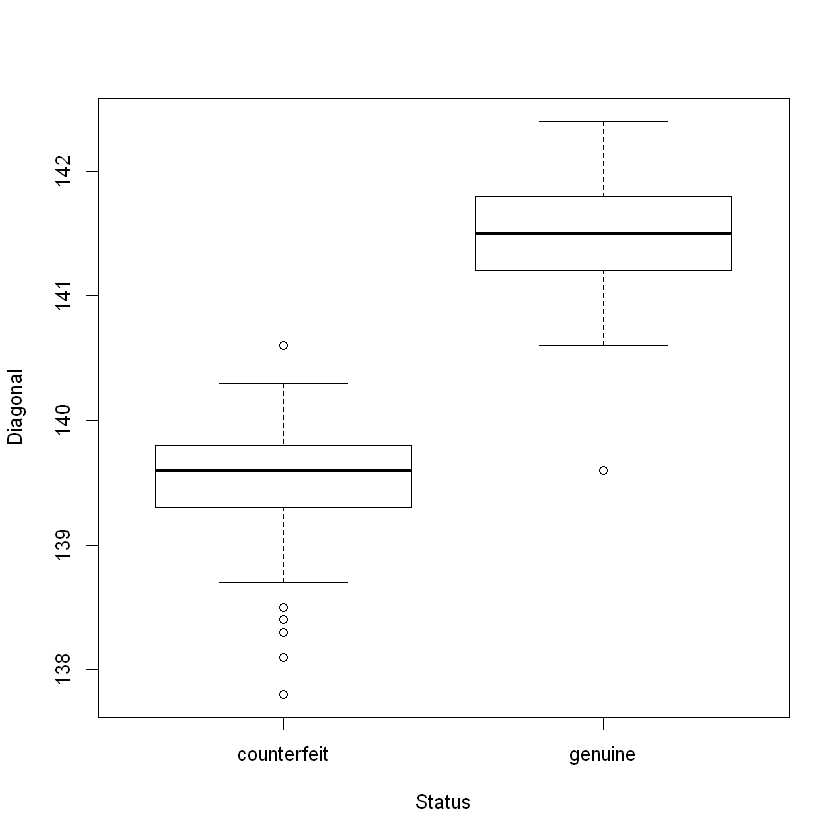

In [26]:
boxplot(Diagonal ~ Status, data = bn.train)


# 4 主成分分析

page 18

In [12]:
data(iris)
irisdata<- iris[,-5]
head(irisdata)

Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
5.1,3.5,1.4,0.2
4.9,3.0,1.4,0.2
4.7,3.2,1.3,0.2
4.6,3.1,1.5,0.2
5.0,3.6,1.4,0.2
5.4,3.9,1.7,0.4


In [16]:
# 主成分分析
res.pca <- prcomp( iris[, -5], scale = TRUE )
res.pca

Standard deviations (1, .., p=4):
[1] 1.7083611 0.9560494 0.3830886 0.1439265

Rotation (n x k) = (4 x 4):
                    PC1         PC2        PC3        PC4
Sepal.Length  0.5210659 -0.37741762  0.7195664  0.2612863
Sepal.Width  -0.2693474 -0.92329566 -0.2443818 -0.1235096
Petal.Length  0.5804131 -0.02449161 -0.1421264 -0.8014492
Petal.Width   0.5648565 -0.06694199 -0.6342727  0.5235971

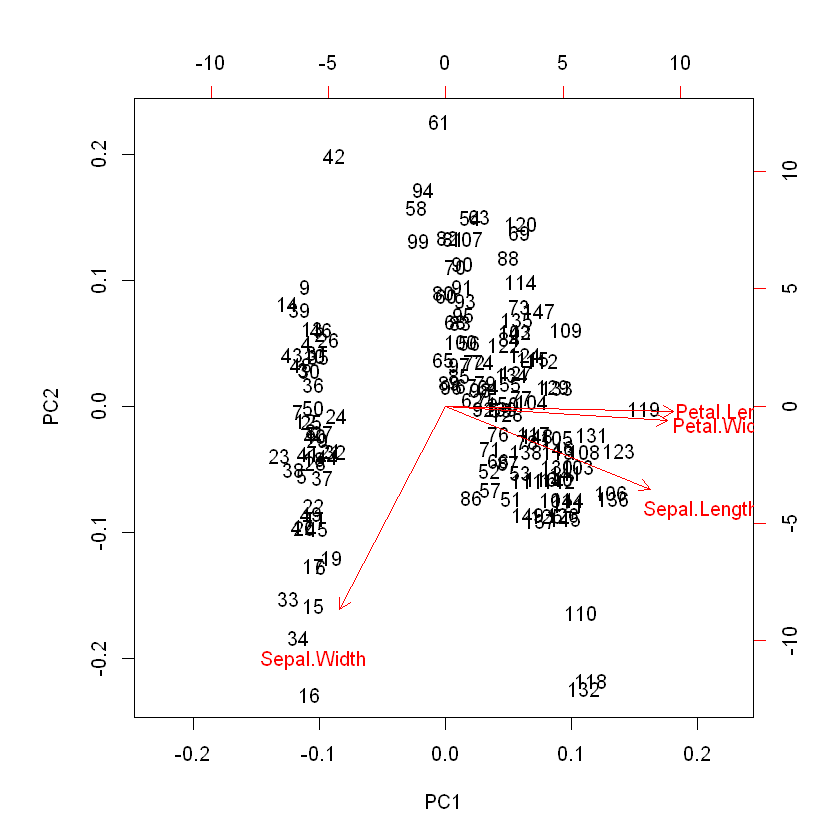

In [17]:

biplot(res.pca)


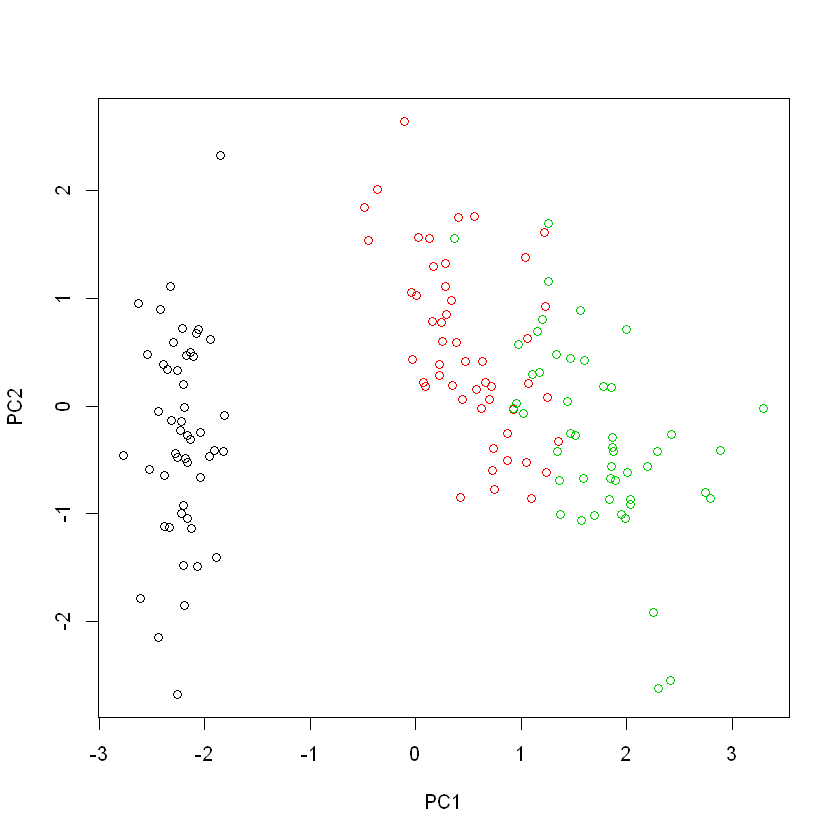

In [18]:
plot( res.pca$x[, 1:2], col = unclass( iris[, 5] ) )


# 演習1
p 31 の例題を行う

プログラムは下記に

必要ならセルを追加する

# 演習2
余裕のある人は、さらに演習2をやるか、最終報告について検討しよう。

その他、適当なデータで主成分分析をしてみよう。

貿易統計、雇用統計などは政府の統計データから細かいデータが入手できる。

プログラムは以下に。

データは(添付して問題がないものであれば)添付する。

必要に応じて、セルを追加する。
